# Ford Go Bike Data Expolration 
## by Abdelrahman Youssef

## Investigation Overview

> Describe the overall goals of your presentation here.

## Dataset Overview

> the structure of the data that is wrangled and cleaned , The structure is about 174950
The data set that is going to be used in this study are constructed as follow: 
diuration for the bike rented in sec ,the start time ,user type ,the year of birth,the gender, Age ,Bike ID ,bike share for all trip 


In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [37]:
# we load the the data set to the project 
ford_bike = pd.read_csv('201902-fordgobike-tripdata.csv')
ford_bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [38]:
# let us know the the structure of the this data 
ford_bike.shape

(183412, 16)

In [39]:
#let us see if there is a null values within our data set 
ford_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [40]:
# drop nll values and after that check again if there is one or not 
ford_bike.dropna(inplace = True)

In [41]:
# now we check if the number of the rows meet requiremnt for the project
ford_bike.shape

(174952, 16)

In [42]:
#check again if there is null variable 
ford_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [43]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [44]:
# drop all the un-necessary columns that will not be used for the study 
ford_bike = ford_bike.drop(['end_time','start_station_id','start_station_name',
               'start_station_latitude','start_station_longitude','end_station_id',
                            'end_station_name','end_station_latitude',
                            'end_station_longitude'] , axis = 1 )
#make sure to meet the requiremnt of 8 variables and above 600 observations 
ford_bike.shape

(174952, 7)

In [45]:
# measure age form the member_birth_year 
ford_bike['Year'] = 2021 - ford_bike['member_birth_year']
ford_bike.head()
# feature engineering 

,duration_sec,start_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Year
0,52185,2019-02-28 17:32:10.1450,4902,Customer,1984.0,Male,No,37.0
2,61854,2019-02-28 12:13:13.2180,5905,Customer,1972.0,Male,No,49.0
3,36490,2019-02-28 17:54:26.0100,6638,Subscriber,1989.0,Other,No,32.0
4,1585,2019-02-28 23:54:18.5490,4898,Subscriber,1974.0,Male,Yes,47.0
5,1793,2019-02-28 23:49:58.6320,5200,Subscriber,1959.0,Male,No,62.0


In [46]:
#remove any duplication in the data  but 1st we need to count it 
ford_bike.duplicated().sum()

0

In [47]:
#remove the duplication 
ford_bike.drop_duplicates(inplace = True)
ford_bike.shape

(174952, 8)

In [48]:
ford_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 8 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   bike_id                  174952 non-null  int64  
 3   user_type                174952 non-null  object 
 4   member_birth_year        174952 non-null  float64
 5   member_gender            174952 non-null  object 
 6   bike_share_for_all_trip  174952 non-null  object 
 7   Year                     174952 non-null  float64
dtypes: float64(2), int64(2), object(4)
memory usage: 12.0+ MB


### What is the structure of your dataset?

> the structure of the data that is wrangled and cleaned is about 174950 ,the features that are included :
diuration for the bike rented , the start time , user ype , the year of birth , and the gender 


### What is/are the main feature(s) of interest in your dataset?

#### 1- The percentage of the Gender that rent the bike .
#### 2- The percentage of the subscribed and normal customer .
#### 3- Does gender affect the duration of the trip ?.
#### 4- The age and how it is affect duration time  .
#### 5- Does Age and Gender have and effect on the duration rented ? ..


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the feature that will help spport study Age as it is will be morelikely the higher the age the duration time, on top of that 
it could lead to minmum number of subscribtion 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### First : let us start with finding percentage of the Gender that rent the bike :

In [49]:
# before plotting the percentage lest us see the number for of the people for the gender 
gender_counts = ford_bike['member_gender'].value_counts()
gender_counts 

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [50]:
#sort the variables by it size 
gender_order = gender_counts.index
gender_order

Index(['Male', 'Female', 'Other'], dtype='object')

## The percentage of Gender That use Ford Bike 

> About 75% from Males are using the service for renting the Ford Bike , and 23 % from females renting the same kind of  bikes 

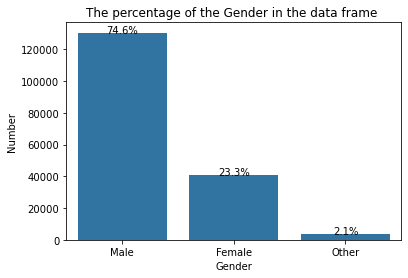

In [51]:
#selecting the color and plot the bar chart for the gender by the order 
base_color = sb.color_palette()[0]
sb.countplot(data=ford_bike, x='member_gender', color=base_color, order=gender_order);

plt.xlabel('Gender');
plt.ylabel('Number');
locs, labels = plt.xticks(rotation=0) 
# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # calculating the percentage of the gender
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/ford_bike.shape[0])

    # print the percentage on the graph 
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    plt.title('The percentage of the Gender in the data frame ');

##### About 75% from Males are using the service for renting the Ford Bike , and 23 % from females renting the same kind of  bikes 

### Secondly :  the percentage of the subscribed and normal customer :

In [52]:
sub_counts = ford_bike['user_type'].value_counts()
sub_counts 

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

In [53]:
sub_order = sub_counts.index
sub_order

Index(['Subscriber', 'Customer'], dtype='object')

## The percentage of people if they are consumers to the service or subscriber 
> The percentage of the people that are subscribed in this service is about 91% , while the remaining is about 9 % 

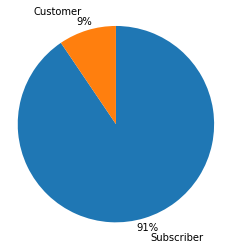

In [54]:
## resource for creating the the below chart is from this https://stackoverflow.com/questions/21572870/matplotlib-percent-label-position-in-pie-chart
plt.pie(sub_counts, labels = sub_counts.index, startangle = 90 ,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2, counterclock = False);
plt.axis('square');

#### the percentage of the people that are subscribed in this service is about 91% , while the remaining is about 9 % 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The number of Male driver are very large combared two the number of women . 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There age feature is added for more redability.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Does gender has an affect on the duration of the trip ? 

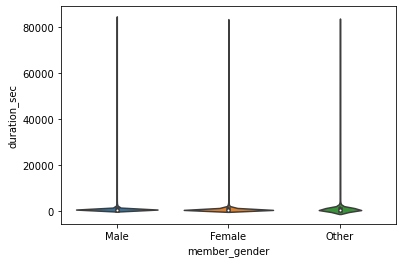

In [55]:
gender = ['Male', 'Female' ,'Other']

# Returns the types for sedan_classes with the categories and orderedness
g_cat =pd.api.types.CategoricalDtype(ordered=True, categories= gender)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
ford_bike['member_gender'] = ford_bike['member_gender'].astype(g_cat)

sb.violinplot(data=ford_bike , x ='member_gender', y='duration_sec');

In [56]:
# this is to see the minmum number of diruation to convert it from secondes to mintues 
ford_bike['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [57]:
#creat a new column that hold durtation by mints for more convenient
ford_bike['duration_min'] = ford_bike['duration_sec']/60
ford_bike.head()

,duration_sec,start_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Year,duration_min
0,52185,2019-02-28 17:32:10.1450,4902,Customer,1984.0,Male,No,37.0,869.750000
2,61854,2019-02-28 12:13:13.2180,5905,Customer,1972.0,Male,No,49.0,1030.900000
3,36490,2019-02-28 17:54:26.0100,6638,Subscriber,1989.0,Other,No,32.0,608.166667
4,1585,2019-02-28 23:54:18.5490,4898,Subscriber,1974.0,Male,Yes,47.0,26.416667
5,1793,2019-02-28 23:49:58.6320,5200,Subscriber,1959.0,Male,No,62.0,29.883333


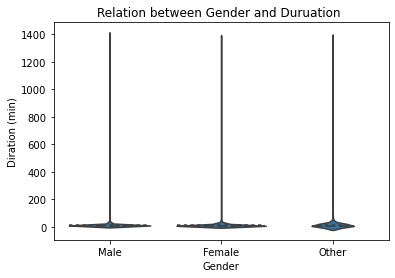

In [58]:
# now we are going to plot the relation betwen gender and duration by mints 
base_color = sb.color_palette()[0]
sb.violinplot(data=ford_bike , x ='member_gender', y='duration_min', color=base_color,  inner='quartile');
plt.title('Relation between Gender and Duruation ');
plt.xlabel('Gender');
plt.ylabel('Diration (min)');

In [59]:
#There is an outlier in renting ford bike so we are going to filter 
# Data for those that hired the bike only for 1 hr or below 
one_hr_rental = ford_bike.query('duration_min < 60')
one_hr_rental.describe()

,duration_sec,bike_id,member_birth_year,Year,duration_min
count,173566.000000,173566.000000,173566.000000,173566.000000,173566.000000
mean,618.501527,4481.421580,1984.808390,36.191610,10.308359
std,443.774126,1659.517988,10.116912,10.116912,7.396235
min,61.000000,11.000000,1878.000000,20.000000,1.016667
25%,321.000000,3796.750000,1980.000000,29.000000,5.350000
50%,507.000000,4960.000000,1987.000000,34.000000,8.450000
75%,780.000000,5505.000000,1992.000000,41.000000,13.000000
max,3596.000000,6645.000000,2001.000000,143.000000,59.933333


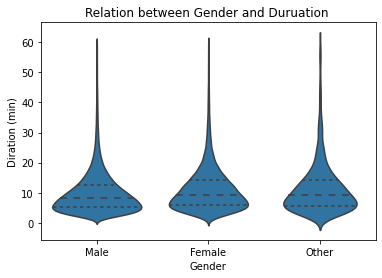

In [60]:
base_color = sb.color_palette()[0]
sb.violinplot(data=one_hr_rental , x ='member_gender', y='duration_min', color=base_color,  inner='quartile');
plt.title('Relation between Gender and Duruation ');
plt.xlabel('Gender');
plt.ylabel('Diration (min)');

This graph illustrated that there is now diffrence among gender for the duration time 

### The age and how its effect duration time  


In [61]:
# from age column we could make a level of ages as this table in the research on this link suggest 
# https://www.researchgate.net/figure/Age-intervals-and-age-groups_tbl1_228404297
# on top of that this link illustrate how to create a level 
# https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o
# we are going to have 3 levels of ages 
def age_level(row):
    #age below 39 is considerd as young
   if row['Year'] <= 39 :
      return 'Young'
    # age betwwen 39 and 59 is considerd in the middle age
   if row['Year'] > 39 and row['Year'] <= 59:
      return 'Middle_Age'
    # age between 59 and 143 is consoderd elder 
   if row['Year'] > 59 and row['Year'] <= 143:
      return 'Elder'

In [62]:
#then apply the pervious formula to add a new col. with age level 
ford_bike['age_level']=ford_bike.apply(lambda row: age_level(row), axis=1)
ford_bike['age_level'] = ford_bike['age_level'].astype(str)
ford_bike.head()

,duration_sec,start_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Year,duration_min,age_level
0,52185,2019-02-28 17:32:10.1450,4902,Customer,1984.0,Male,No,37.0,869.750000,Young
2,61854,2019-02-28 12:13:13.2180,5905,Customer,1972.0,Male,No,49.0,1030.900000,Middle_Age
3,36490,2019-02-28 17:54:26.0100,6638,Subscriber,1989.0,Other,No,32.0,608.166667,Young
4,1585,2019-02-28 23:54:18.5490,4898,Subscriber,1974.0,Male,Yes,47.0,26.416667,Middle_Age
5,1793,2019-02-28 23:49:58.6320,5200,Subscriber,1959.0,Male,No,62.0,29.883333,Elder


In [63]:
#to check the counts of the genders 
age_level_counts = ford_bike['age_level'].value_counts()
age_level_counts

Young         124964
Middle_Age     44207
Elder           5781
Name: age_level, dtype: int64

In [64]:
one_hr_rental = ford_bike.query('duration_min < 60')
one_hr_rental.head()

,duration_sec,start_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Year,duration_min,age_level
4,1585,2019-02-28 23:54:18.5490,4898,Subscriber,1974.0,Male,Yes,47.0,26.416667,Middle_Age
5,1793,2019-02-28 23:49:58.6320,5200,Subscriber,1959.0,Male,No,62.0,29.883333,Elder
6,1147,2019-02-28 23:55:35.1040,3803,Subscriber,1983.0,Female,No,38.0,19.116667,Young
7,1615,2019-02-28 23:41:06.7660,6329,Subscriber,1989.0,Male,No,32.0,26.916667,Young
8,1570,2019-02-28 23:41:48.7900,6548,Subscriber,1988.0,Other,No,33.0,26.166667,Young


In [65]:
one_hr_rental['age_level'].value_counts()

Young         124016
Middle_Age     43809
Elder           5741
Name: age_level, dtype: int64

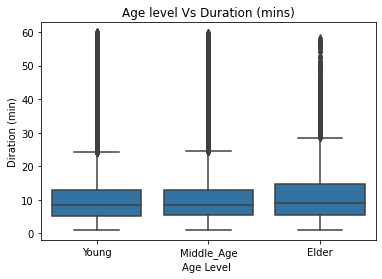

In [66]:
# now lets determine the realtion between age level and diration time 
sb.boxplot(data=one_hr_rental, x='age_level', y='duration_min', color=base_color , order = ['Young' , 'Middle_Age','Elder']);
plt.title('Age level Vs Duration (mins)');
plt.xlabel('Age Level ');
plt.ylabel('Diration (min)');


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  There is no diffrent in the diruation time among the Age level and at the same time the gender type. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The elder more likely spend alittle time more in renting bike as illustrated in the pervious figure 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Does Age and Gender have and effect on the duration rented ? .

## Relation between Duration and Age level with respect to Gender 

> The intersting thing in this graph is it shows that for the elder the number of those who use bikes are greater than Middle age , as it could be that they have much time to enjoy thier life after they being retired.

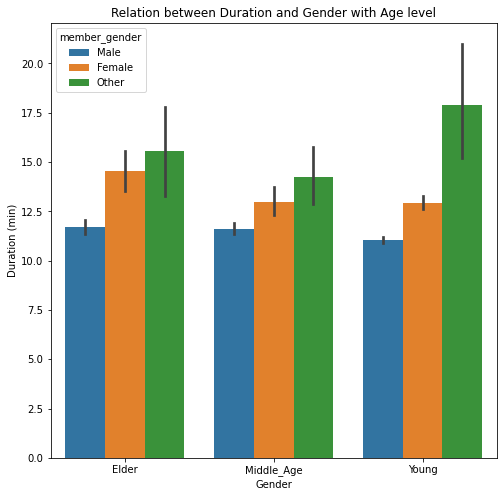

In [67]:
# plottting a multivarate figure by using bar plot to see what is the relation between age , duration time , and gender 
plt.figure(figsize = [8, 8])
sb.barplot(x='age_level', y = 'duration_min', hue='member_gender', data=ford_bike.sort_values(by= 'age_level'))
plt.title('Relation between Duration and Gender with Age level');
plt.xlabel('Gender');
plt.ylabel('Duration (min)');


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We could see from the pervious graph that for the young genarations there is alot of people that uses bikes.

### Were there any interesting or surprising interactions between features?

> The intersting thing in this graph is it shows that for the elder the number of those who use bikes are greater than Middle age , as it could be that they have much time to enjoy thier life after they being retired.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `!jupyter nbconvert slidshow.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [68]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 618034 bytes to slide_deck_template.slides.html
